# Analysis of air quality stations located in the Czech Republic. 

The data has been collected from the following five stations: 

- CZ0TVER: Vernovice
- CZ0TCTN: Cesky Tesın
- CZ0ULOM: Lom
- CZ0TVER: Decın
- CZ0TKAR: Karvina

The dataset has the following columns: 

- <u>Year</u>: Year 2016 for all observations
- <u>Month Month</u>: as integer from 1 to 12
- <u>Day</u>: Day of the Month
- <u>Hour</u>: Hour of the Day (as integer from 0 to 23)
- <u>AirQualityStationEoICode</u>: Station code as given above
- <u>AirPollutant</u>: Air pollutant (“PM10” for all observations)
- <u>Concentration</u>: Concentration of the air pollutant

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV file
data = pd.read_csv("airquality.csv", index_col=0)

In [3]:
########## Create a CSV for each measuring station

measuring_stations = data.AirQualityStationEoICode.unique() #Obtain the code of each measuring station
print(measuring_stations)

['CZ0TVER' 'CZ0TCTN' 'CZ0ULOM' 'CZ0UDCM' 'CZ0TKAR']


In [4]:
#Obtain observations for each station and generate the csv file

data_CZ0TVER = data.loc[data["AirQualityStationEoICode"] == "CZ0TVER"] 
data_CZ0TVER.to_csv("data_CZ0TVER.csv")                                

data_CZ0TCTN = data.loc[data["AirQualityStationEoICode"] == "CZ0TCTN"]
data_CZ0TCTN.to_csv("data_CZ0TCTN.csv")

data_CZ0ULOM = data.loc[data["AirQualityStationEoICode"] == "CZ0ULOM"]
data_CZ0ULOM.to_csv("data_CZ0ULOM.csv")

data_CZ0UDCM = data.loc[data["AirQualityStationEoICode"] == "CZ0UDCM"]
data_CZ0UDCM.to_csv("data_CZ0UDCM.csv")

data_CZ0TKAR = data.loc[data["AirQualityStationEoICode"] == "CZ0TKAR"]
data_CZ0TKAR.to_csv("data_CZ0TKAR.csv")

In [5]:
########## Date and station with the largest concentration

maxValue = data["Concentration"].max() #Find the observation with the max concentration value
max_concentration = data.loc[data.Concentration == maxValue, ["Month", "Day", "AirQualityStationEoICode"]] #Extract date and station
print(max_concentration)

      Month  Day AirQualityStationEoICode
Year                                     
2016     11    6                  CZ0UDCM


In [ ]:
########## Avg. concentration for each station/day

AvgConcen = data.groupby(["AirQualityStationEoICode", "Month", "Day"])["Concentration"].mean().reset_index(name = "Daily Avg.")
print(AvgConcen)

In [7]:
########## Stations which are EU Directive 2008/50/EC compliant
    #PM10 concentration must not exceed 40 µg/m3
    #PM10 concentration is not allowed to exceed 50 µg/m3 on more than 35 days each year

#Calculate the yearly and daily limits for each stations
PM10_yearly_Average = data.groupby(["AirQualityStationEoICode"])[["Concentration"]].mean()
PM10_daily_Average = data.groupby(["AirQualityStationEoICode", "Month", "Day"])[["Concentration"]].mean()
PM10_daily_Average_count = PM10_daily_Average[PM10_daily_Average["Concentration"] > 50].groupby("AirQualityStationEoICode")["Concentration"].count()

#Merge both limist into one 
eu_complient = pd.concat([PM10_yearly_Average, PM10_daily_Average_count], axis=1)
eu_complient.columns = ["Yearly_limit", "Daily_limit"]

In [8]:
#Create a function to check if the station is EU EU Directive 2008/50/EC compliant
def EU_compliant (x):
    "This function checks whether each station meets the EU Directive 2008/50/EC requirements"
    if (x["Yearly_limit"] < 40) and (x["Daily_limit"] < 35):
        return "Yes"
    else:
        return "No"

In [9]:
#Use the EU_compliant function to add a new column: EU_compliant
eu_complient["EU_compliant"] = eu_complient.apply(EU_compliant, axis=1)
print(eu_complient)

                          Yearly_limit  Daily_limit EU_compliant
AirQualityStationEoICode                                        
CZ0TCTN                      32.882018           58           No
CZ0TKAR                      33.822962           59           No
CZ0TVER                      39.714682           85           No
CZ0UDCM                      28.975914           44           No
CZ0ULOM                      28.500649           39           No


In [10]:
########## Remove data that does not beloging to December
Dec_data = data[data["Month"] == 12] 
print(Dec_data)

      Month  Day  Hour AirQualityStationEoICode AirPollutant  Concentration
Year                                                                       
2016     12    1     0                  CZ0TVER         PM10           40.0
2016     12    1     1                  CZ0TVER         PM10           24.0
2016     12    1     2                  CZ0TVER         PM10            8.0
2016     12    1     3                  CZ0TVER         PM10           19.0
2016     12    1     4                  CZ0TVER         PM10           24.0
...     ...  ...   ...                      ...          ...            ...
2016     12   31    19                  CZ0TKAR         PM10           40.0
2016     12   31    20                  CZ0TKAR         PM10           64.0
2016     12   31    21                  CZ0TKAR         PM10           84.0
2016     12   31    22                  CZ0TKAR         PM10           74.0
2016     12   31    23                  CZ0TKAR         PM10           87.0

[3700 rows 

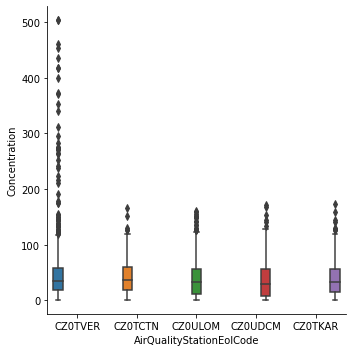

In [11]:
########## Boxplot of the concentration for each station in December
sns.catplot("AirQualityStationEoICode", "Concentration", hue="AirQualityStationEoICode", data=Dec_data, kind="box")
plt.show() 

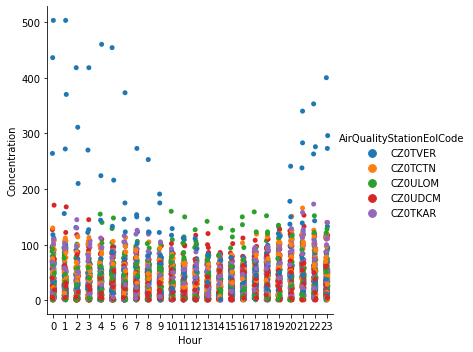

In [12]:
########## Scatter plot of the concentrations against hour of the day
sns.catplot("Hour", "Concentration", hue="AirQualityStationEoICode", data=Dec_data)
plt.show() 

# Analysis of the TV series Game of Thrones contained in the following files

**Appearances:**
- <u>MSceneID:</u> Unique identifier of the scene
- <u>Character:</u> Name of character

**Characters:**
- <u>Name:</u> Name of the character
- <u>Royal:</u> Boolean indicator of whether character is a royal or not
- <u>House:</u> Name of the house the character belongs to (if any)
- <u>Gender:</u> “male” or “female”

**Episodes:**
- <u>EpisodeID:</u> Unique identifier of the episode
- <u>Season:</u> Season number (1-8)
- <u>Episode:</u> Episode number within season
- <u>Title:</u> Title of the episode

**Scenes:**
- <u>SceneID:</u> Unique identifier of the scene
- <u>EpisodeID:</u> Unique identifier of the episode the scene is from
- <u>SceneStart:</u> Decimal minute of the start of the scene
- <u>SceneEnd:</u> Decimal minute of the end of the scene
- <u>Location:</u> Location of the scene
- <u>DetailedLocation:</u> Detailed location of the scene

In [13]:
########## Read CSV files
appearances = pd.read_csv("appearances.csv", index_col=0)
characters = pd.read_csv("characters.csv", index_col=0)
episodes = pd.read_csv("episodes.csv", index_col=0)
scenes = pd.read_csv("scenes.csv", index_col=0)

In [14]:
########## Characters from House Stark
characters = characters.set_index("Name")
Stark_characters = characters.loc[characters.House=="Stark",].index
print(Stark_characters)

Index(['Arya Stark', 'Benjen Stark', 'Brandon Stark', 'Bran Stark',
       'Catelyn Stark', 'Eddard Stark', 'Ghost', 'Grey Wind', 'Jon Snow',
       'Lady', 'Lyanna Stark', 'Nymeria', 'Rickard Stark', 'Rickon Stark',
       'Robb Stark', 'Sansa Stark', 'Shaggydog', 'Summer',
       'Young Benjen Stark', 'Young Lyanna Stark', 'Young Ned',
       'Young Ned Stark'],
      dtype='object', name='Name')


In [15]:
########## Characters that appears in most scenes
max_appearances = appearances["Character"].value_counts()
print(max_appearances.iloc[[0]])

Jon Snow    632
Name: Character, dtype: int64


In [16]:
########## For each house which character appeared in the most scenes

#Load characters again
characters = pd.read_csv("characters.csv", index_col=0)

#Merge appearances and characters
characters = characters.rename(columns={"Name": "Character"}) #Align column label to do the merge
appearances_characters = appearances.merge(characters, on = "Character")

#Count how many times a name appears in the list grouped by House and Name
most_scenes = appearances_characters.groupby(["House", "Character"])["Character"].count().reset_index(name = "Appearances")

#Get the max value of each group
result = most_scenes.loc[most_scenes.groupby("House")["Appearances"].idxmax()]
print(result)

        House           Character  Appearances
0       Arryn          Lysa Arryn           10
2   Baratheon   Joffrey Baratheon          119
10     Bolton         Ramsay Snow           81
18       Frey         Walder Frey           25
22    Greyjoy       Theon Greyjoy          179
30  Lannister    Tyrion Lannister          544
35    Martell        Ellaria Sand           47
42    Mormont       Jorah Mormont          257
51      Stark            Jon Snow          632
64  Targaryen  Daenerys Targaryen          509
71      Tarly         Talla Tarly            2
73      Tully        Edmure Tully           30
77     Tyrell     Margaery Tyrell          125
79      Umber           Ned Umber            7


In [17]:
########## Last Robb Stark appearance

#Get all the scenes where Robb appears, print the last one
Robb_Startk = appearances.loc[appearances["Character"] == "Robb Stark"]
print(Robb_Startk.tail(1))

            Character
SceneID              
S06E06S04  Robb Stark


In [18]:
########## Scenes from season 4 beyond the wall 

#Merge episodes and scenes datasets and get all the scenes from season 4
episodes_scenes = episodes.merge(scenes, on="EpisodeID")
s04_episodes = episodes_scenes.loc[(episodes_scenes["Season"] == 4)]

In [19]:
def Beyond_the_Wall (x):
    "This function checks whether each scene is beyond the wall or not"
    if (x["Location"] == "North of the Wall"):
        return "Yes"
    else:
        return "No"

In [20]:
#Use the Beyond_the_Wall function to and a new column that shows if the scene is beyond the wall
s04_episodes["Beyond_the_Wall"] = s04_episodes.apply(Beyond_the_Wall, axis=1)
print(s04_episodes) #The above line returns an error but still prints the correct result


     EpisodeID  Season  Episode         Title    SceneID  SceneStart  \
1224    S04E01       4        1    Two Swords  S04E01S01    0.116667   
1225    S04E01       4        1    Two Swords  S04E01S02    3.600000   
1226    S04E01       4        1    Two Swords  S04E01S03    6.483333   
1227    S04E01       4        1    Two Swords  S04E01S04    8.033333   
1228    S04E01       4        1    Two Swords  S04E01S05    9.416667   
...        ...     ...      ...           ...        ...         ...   
1736    S04E10       4       10  The Children  S04E10S41   60.833333   
1737    S04E10       4       10  The Children  S04E10S42   61.350000   
1738    S04E10       4       10  The Children  S04E10S43   62.200000   
1739    S04E10       4       10  The Children  S04E10S44   62.833333   
1740    S04E10       4       10  The Children  S04E10S45   63.850000   

       SceneEnd        Location   DetailedLocation Beyond_the_Wall  
1224   1.783333  The Crownlands     King's Landing              No

<ipython-input-20-3932db38ca66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s04_episodes["Beyond_the_Wall"] = s04_episodes.apply(Beyond_the_Wall, axis=1)


In [21]:
########## Screen time per character and season

#Merge all the necesary datasets and create a new variable Screen_time
episodes_scenes_appearances = episodes_scenes.merge(appearances, on="SceneID")
episodes_scenes_appearances = episodes_scenes_appearances.eval("Screen_time = SceneEnd - SceneStart")

Screen_time = episodes_scenes_appearances[["Season","Character", "Screen_time"]]
Screen_time = Screen_time.groupby(["Season", "Character"])["Screen_time"].sum().reset_index(name="sum")
print(Screen_time)

      Season        Character        sum
0          1   Addam Marbrand   1.266667
1          1   Alliser Thorne  19.033333
2          1           Armeca   5.066667
3          1       Arya Stark  60.916667
4          1  Barristan Selmy  32.250000
...      ...              ...        ...
1070       8            Willa   0.366667
1071       8   Winterfell Boy   1.233333
1072       8    Wun Wun Wight   1.150000
1073       8     Yara Greyjoy  15.833333
1074       8       Yohn Royce  32.900000

[1075 rows x 3 columns]


In [22]:
#Hierarchical index
Screen_time_hIndex = Screen_time.set_index(["Season", "Character"])
print(Screen_time_hIndex )

                              sum
Season Character                 
1      Addam Marbrand    1.266667
       Alliser Thorne   19.033333
       Armeca            5.066667
       Arya Stark       60.916667
       Barristan Selmy  32.250000
...                           ...
8      Willa             0.366667
       Winterfell Boy    1.233333
       Wun Wun Wight     1.150000
       Yara Greyjoy     15.833333
       Yohn Royce       32.900000

[1075 rows x 1 columns]


In [23]:
#Wide format
Screen_time_wide = Screen_time.pivot(index="Character", columns="Season", values="sum")
print(Screen_time_wide.head())

print(Screen_time)

Season                      1   2   3         4   5          6    7   8
Character                                                              
Addam Marbrand       1.266667 NaN NaN       NaN NaN        NaN  NaN NaN
Adele Smyth-Kennedy       NaN NaN NaN       NaN NaN        NaN  0.6 NaN
Adrack Humble             NaN NaN NaN  3.166667 NaN        NaN  NaN NaN
Aeron Greyjoy             NaN NaN NaN       NaN NaN  10.016667  NaN NaN
Aerys Targaryen           NaN NaN NaN       NaN NaN   0.383333  NaN NaN
      Season        Character        sum
0          1   Addam Marbrand   1.266667
1          1   Alliser Thorne  19.033333
2          1           Armeca   5.066667
3          1       Arya Stark  60.916667
4          1  Barristan Selmy  32.250000
...      ...              ...        ...
1070       8            Willa   0.366667
1071       8   Winterfell Boy   1.233333
1072       8    Wun Wun Wight   1.150000
1073       8     Yara Greyjoy  15.833333
1074       8       Yohn Royce  32.900000

[10

In [24]:
########## Line chart which shows for each season the screen time for the following characters:
    #Jon Snow
    #Daenerys Targaryen
    #Jamie Lannister
    #Cersei Lannister
    #Tyrion Lannister
    #Sansa Stark
    #Arya Stark

#Create the dataset to be used in the plot
main_characters = ("Jon Snow", "Daenerys Targaryen", "Jamie Lannister", "Cersei Lannister", "Tyrion Lannister", "Sansa Stark", "Arya Stark")
to_plot = Screen_time[Screen_time["Character"].isin(main_characters)]
print(to_plot)

      Season           Character         sum
3          1          Arya Stark   60.916667
11         1    Cersei Lannister   70.866667
13         1  Daenerys Targaryen   81.666667
40         1            Jon Snow   88.716667
94         1         Sansa Stark   60.133333
110        1    Tyrion Lannister   81.716667
129        2          Arya Stark   56.216667
141        2    Cersei Lannister   50.350000
144        2  Daenerys Targaryen   50.616667
178        2            Jon Snow   44.300000
231        2         Sansa Stark   40.916667
252        2    Tyrion Lannister   87.616667
263        3          Arya Stark   43.533333
276        3    Cersei Lannister   40.483333
281        3  Daenerys Targaryen   46.000000
312        3            Jon Snow   43.666667
366        3         Sansa Stark   39.483333
386        3    Tyrion Lannister   69.100000
402        4          Arya Stark   41.833333
413        4    Cersei Lannister   78.233333
418        4  Daenerys Targaryen   41.500000
455       

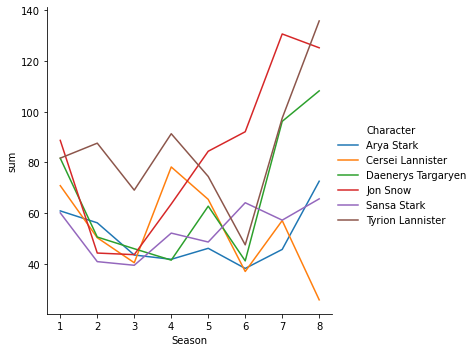

In [25]:
sns.relplot("Season", "sum", kind="line", hue="Character", data=to_plot)
plt.show()